<a href="https://colab.research.google.com/github/gmkumar1988/Cluster-Analysis/blob/main/Natural_Language_Processing_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
financial_data = pd.read_csv('/content/financial_news_events.csv')

In [4]:
financial_data.head()


,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,NaN,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,NaN,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...


In [5]:
financial_new_df = financial_data.dropna()

In [6]:
financial_new_df.isna().sum()

,0
Date,0
Headline,0
Source,0
Market_Event,0
Market_Index,0
Index_Change_Percent,0
Trading_Volume,0
Sentiment,0
Sector,0
Impact_Level,0


In [7]:
%whos

Variable                               Type         Data/Info
-------------------------------------------------------------
AutoTokenizer                          type         <class 'transformers.mode<...>tion_auto.AutoTokenizer'>
TFAutoModelForSequenceClassification   type         <class 'transformers.mode<...>rSequenceClassification'>
financial_data                         DataFrame                Date         <...>n[3024 rows x 12 columns]
financial_new_df                       DataFrame                Date         <...>n[2443 rows x 12 columns]
nltk                                   module       <module 'nltk' from '/usr<...>ckages/nltk/__init__.py'>
np                                     module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd                                     module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt                                    module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns         

In [8]:
financial_new_df.head()

,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...
5,2025-03-18,Central bank maintains status quo on interest ...,Bloomberg,Unemployment Rate Announcement,IBOVESPA,0.56,36.24,Negative,Transportation,Low,ExxonMobil,https://www.reuters.com/markets/indices/ftse-100
6,2025-03-02,Tech Giant's New Product Launch Sparks Sector-...,Barron's,IPO Launch,Shanghai Composite,-3.68,273.35,Neutral,Telecommunications,Medium,JP Morgan Chase,https://www.cnbc.com/2025/08/russia-ukraine-wa...


In [9]:
financial_new_df.ndim

2

<Axes: title={'center': ' Count of Trading Volume by Population'}, xlabel='Index_Change_Percent'>

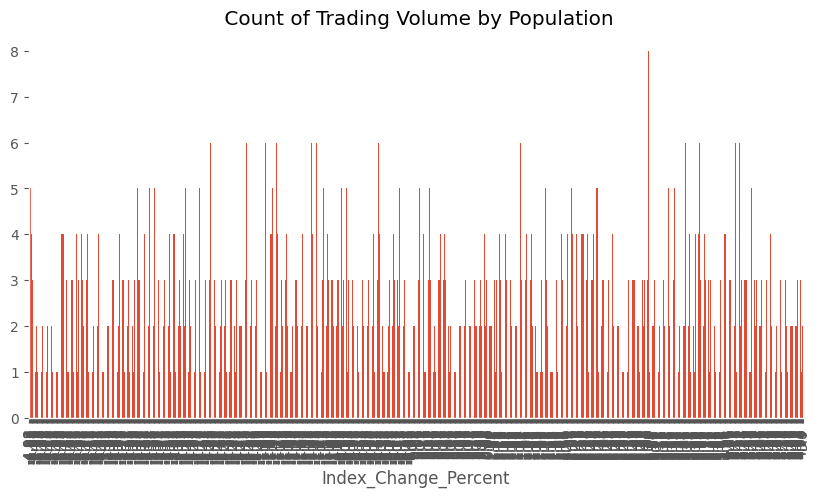

In [10]:
financial_new_df['Index_Change_Percent'].value_counts().sort_index().plot(kind = 'bar',title = ' Count of Trading Volume by Population',
                                                                    figsize= (10,5))

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [15]:
example = financial_new_df['Headline'][500]
print(example)

Consumer confidence index reaches a decade high


In [16]:
example = financial_new_df['Headline'][500]
print(example)

Consumer confidence index reaches a decade high


In [17]:
tokens = nltk.word_tokenize(example)

In [18]:
print(tokens)

['Consumer', 'confidence', 'index', 'reaches', 'a', 'decade', 'high']


In [19]:
tagged = nltk.pos_tag(tokens)

In [20]:
tagged[:10]

[('Consumer', 'NNP'),
 ('confidence', 'NN'),
 ('index', 'NN'),
 ('reaches', 'VBZ'),
 ('a', 'DT'),
 ('decade', 'NN'),
 ('high', 'JJ')]

In [21]:
entities = nltk.chunk.ne_chunk(tagged)

In [22]:
entities.pprint()

(S
  (GSP Consumer/NNP)
  confidence/NN
  index/NN
  reaches/VBZ
  a/DT
  decade/NN
  high/JJ)


    Sentimental Analysis :
    VADER Sentiment Scoring [VADER - Valence Aware Dictionary and Sentiment Reasoner]

VADER : Remove Stop words and each word is scored and combined to total score

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [24]:
from tqdm.notebook import tqdm

In [25]:
sia = SentimentIntensityAnalyzer

In [26]:
text = 'I am so happy !'

Polarity Scores defines negative, neutral and positive measure. Compound score between -1 to +1

In [27]:
sia().polarity_scores(text)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [28]:
sia().polarity_scores(example)

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.5423}

In [29]:
financial_new_df.columns

Index(['Date', 'Headline', 'Source', 'Market_Event', 'Market_Index',
       'Index_Change_Percent', 'Trading_Volume', 'Sentiment', 'Sector',
       'Impact_Level', 'Related_Company', 'News_Url'],
      dtype='object')

In [30]:
res = {}
for i, row in tqdm(financial_new_df.iterrows(), total=len(financial_new_df)):
    text = row['Headline']
    myid = row['Index_Change_Percent']
    res[myid] = sia().polarity_scores(text)

  0%|          | 0/2443 [00:00<?, ?it/s]

In [31]:
### Vader results
print(example)


Consumer confidence index reaches a decade high


In [32]:
sia().polarity_scores(text)

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}

In [33]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/501M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [42]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='tf')
output = model(**encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.011778405), 'roberta_neu': np.float32(0.47179252), 'roberta_pos': np.float32(0.51642907)}


In [45]:
### Run for Roberta Model using functions :
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='tf')
    output = model(**encoded_text)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [37]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Index_Change_Percent'})
results_df = financial_new_df.merge(results_df, how='left')
display(results_df.head())

,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url,neg,neu,pos,compound
0,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500,0.0,1.000,0.000,0.0000
1,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...,0.0,0.659,0.341,0.4767
2,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...,0.0,1.000,0.000,0.0000
3,2025-03-18,Central bank maintains status quo on interest ...,Bloomberg,Unemployment Rate Announcement,IBOVESPA,0.56,36.24,Negative,Transportation,Low,ExxonMobil,https://www.reuters.com/markets/indices/ftse-100,0.0,0.745,0.255,0.3400
4,2025-03-02,Tech Giant's New Product Launch Sparks Sector-...,Barron's,IPO Launch,Shanghai Composite,-3.68,273.35,Neutral,Telecommunications,Medium,JP Morgan Chase,https://www.cnbc.com/2025/08/russia-ukraine-wa...,0.0,1.000,0.000,0.0000


# Task
Analyze the sentiment of the `Headline` column in the DataFrame `financial_new_df` using VADER and RoBERTa models, compare the results with the existing `Sentiment` column, and visualize the sentiment distributions.

## Apply vader and roberta sentiment analysis

### Subtask:
Apply VADER and RoBERTa sentiment analysis to the `Headline` column of the `financial_new_df` DataFrame and store the results in new columns.


**Reasoning**:
Iterate through the DataFrame, apply both VADER and RoBERTa sentiment analysis to each headline, and store the results in a dictionary.



In [48]:
res = {}
sia_instance = sia()
for i, row in tqdm(financial_new_df.iterrows(), total=len(financial_new_df)):
    try:
        text = row['Headline']
        vader_result = sia_instance.polarity_scores(text)
        roberta_result = polarity_scores_roberta(text)
        res[i] = {
            'vader_neg': vader_result['neg'],
            'vader_neu': vader_result['neu'],
            'vader_pos': vader_result['pos'],
            'vader_compound': vader_result['compound'],
            'roberta_neg': roberta_result['roberta_neg'],
            'roberta_neu': roberta_result['roberta_neu'],
            'roberta_pos': roberta_result['roberta_pos']
        }
    except RuntimeError:
        print(f'Broke for index {i}')

  0%|          | 0/2443 [00:00<?, ?it/s]

In [56]:
results_df = pd.DataFrame(res).T
results_df = results_df.dropna()
results_df = results_df.reset_index().rename(columns={'index': 'Index_Change_Percent'})
results_df = financial_new_df.merge(results_df, how='left')
display(results_df.head())

/tmp/ipython-input-2977928529.py:4: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = financial_new_df.merge(results_df, how='left')


,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-18,Central bank maintains status quo on interest ...,Bloomberg,Unemployment Rate Announcement,IBOVESPA,0.56,36.24,Negative,Transportation,Low,ExxonMobil,https://www.reuters.com/markets/indices/ftse-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-02,Tech Giant's New Product Launch Sparks Sector-...,Barron's,IPO Launch,Shanghai Composite,-3.68,273.35,Neutral,Telecommunications,Medium,JP Morgan Chase,https://www.cnbc.com/2025/08/russia-ukraine-wa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Combine and Compare the vader model and roberta model

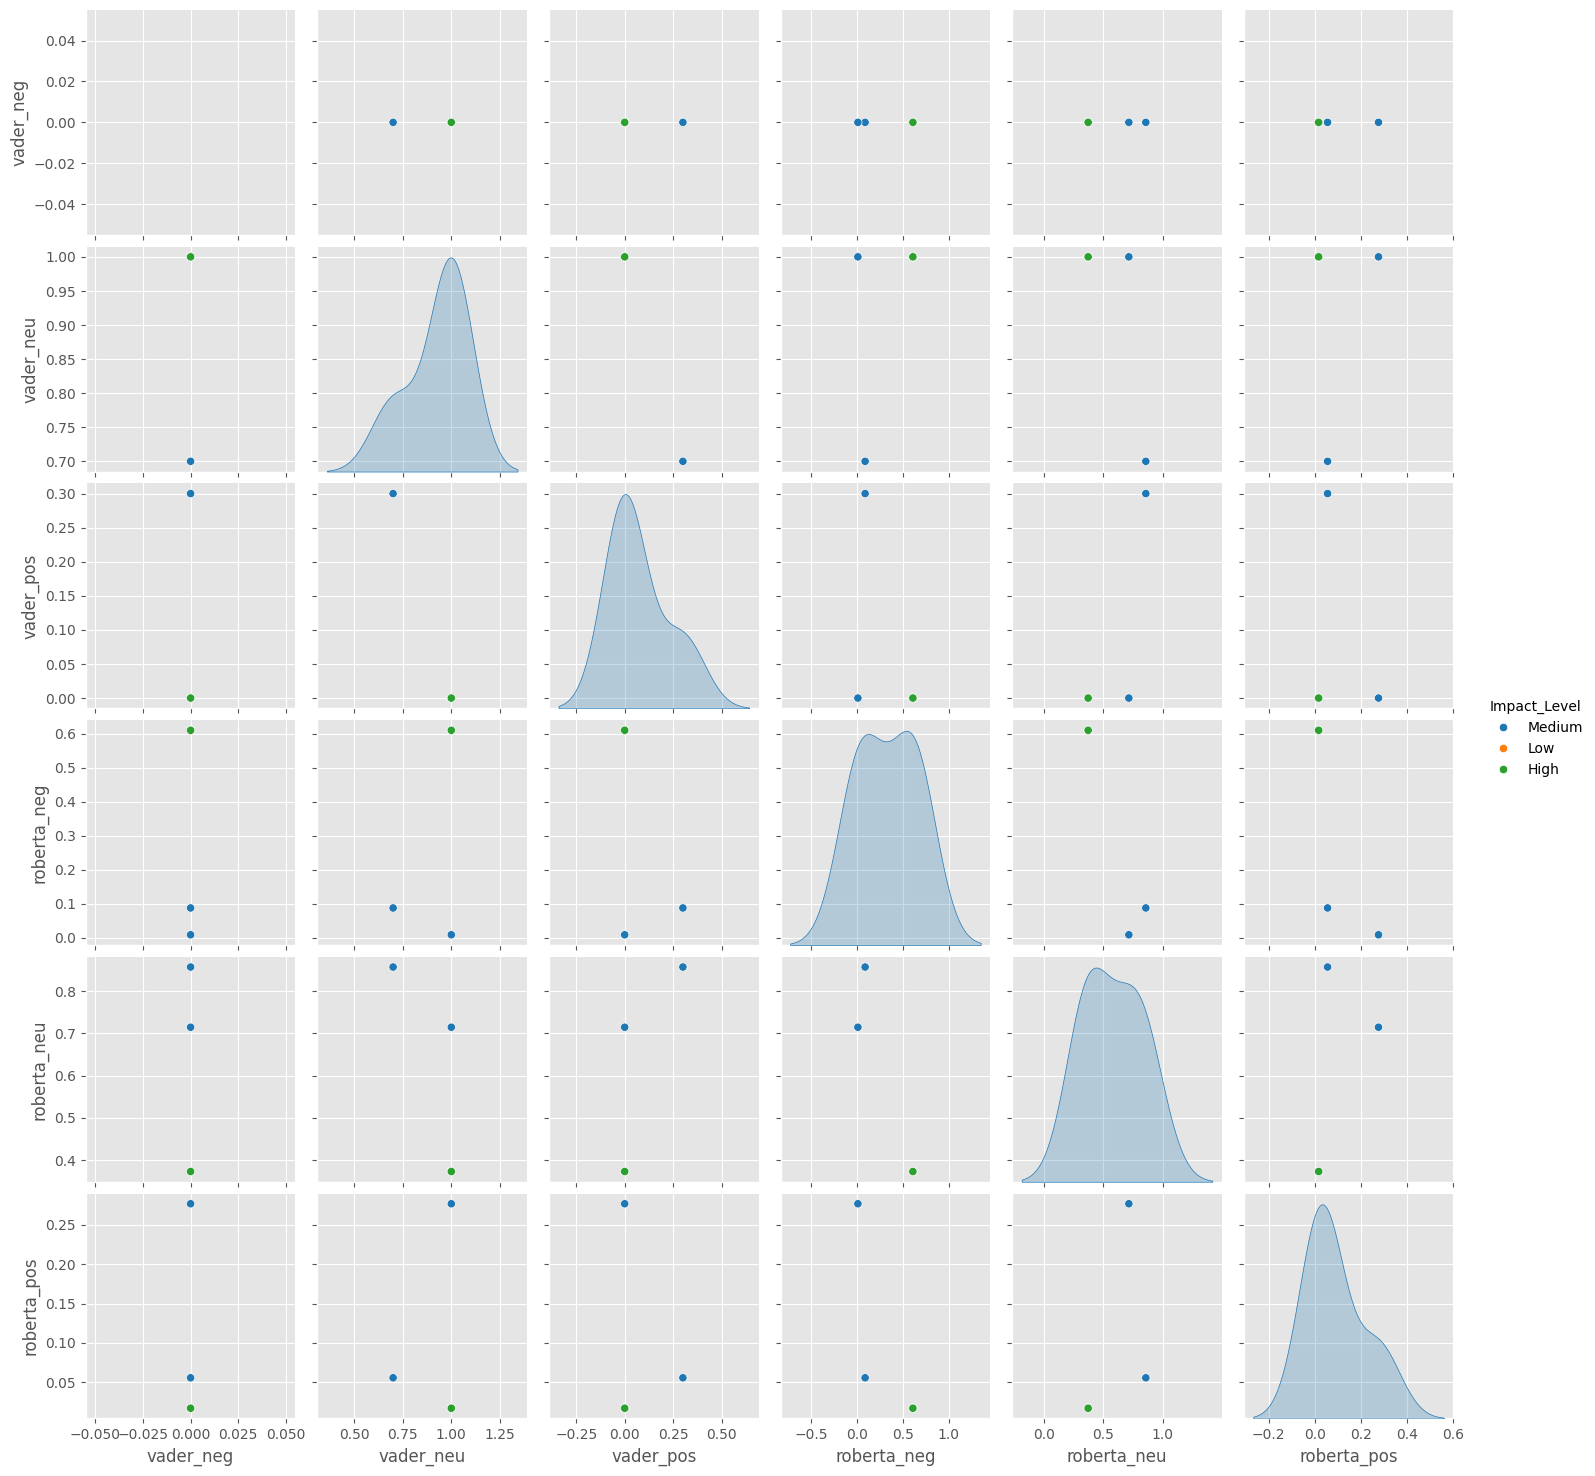

In [58]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Impact_Level',
            palette='tab10')

**Reasoning**:
Convert the results dictionary to a DataFrame, reset the index, rename the index column, merge with the original DataFrame, and display the head of the merged DataFrame.

